<a href="https://colab.research.google.com/github/jessicafalcundes/estatisticas-com-python-exercicios/blob/master/Desafio_Teste_de_Hipotese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 3: Suplementos Alimentares

Imagine que você trabalha em uma empresa que fabrica suplementos alimentares. O time de produtos quer entender qual das três novas fórmulas de proteína em pó proporciona maior ganho de massa muscular em atletas.

Foi realizada uma pesquisa com vários atletas e coletados os seguintes dados no arquivo desafio_03_suplementos.csv:
* id_produto: Código identificador do suplemento
(Fórmula 1, 2 ou 3).
* id_atleta: Código identificador do atleta que participou do estudo.
* ganho_massa: Quantidade de massa muscular ganha (em kg) após 8 semanas de uso.
idade: Idade do atleta.
* frequencia_treino: Número médio de treinos semanais do atleta.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from scipy.stats import pearsonr, f_oneway
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
### leitura dos dados csv
df = pd.read_csv("desafio_03_suplementos.csv", sep = ",")

In [5]:
df.head()

,id_produto,id_atleta,ganho_massa,idade,frequencia_treino
0,Fórmula 3,1,2.24,27,5
1,Fórmula 1,2,4.97,35,4
2,Fórmula 3,3,0.88,30,6
3,Fórmula 3,4,0.09,22,6
4,Fórmula 1,5,2.47,18,6


In [6]:
df.sort_values(by='ganho_massa', ascending=False)

,id_produto,id_atleta,ganho_massa,idade,frequencia_treino
271,Fórmula 2,272,4.98,18,6
213,Fórmula 1,214,4.98,21,6
28,Fórmula 3,29,4.97,38,5
1,Fórmula 1,2,4.97,35,4
76,Fórmula 2,77,4.91,19,3
...,...,...,...,...,...
70,Fórmula 3,71,0.14,36,3
127,Fórmula 1,128,0.09,18,5
3,Fórmula 3,4,0.09,22,6
137,Fórmula 3,138,0.08,32,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_produto         300 non-null    object 
 1   id_atleta          300 non-null    int64  
 2   ganho_massa        300 non-null    float64
 3   idade              300 non-null    int64  
 4   frequencia_treino  300 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 11.8+ KB


In [8]:
print(df.shape)
print(df.columns)

(300, 5)
Index(['id_produto', 'id_atleta', 'ganho_massa', 'idade', 'frequencia_treino'], dtype='object')


### 1. Faça uma análise exploratória dos dados:

* Qual é a média e a mediana do ganho de massa para cada suplemento?
* Como os dados estão distribuídos? Utilize histogramas e boxplots para visualizar as diferenças entre as fórmulas.
* Há outliers no ganho de massa muscular? O que isso pode indicar?




In [9]:
#media e mediana
df.groupby('id_produto')['ganho_massa'].agg(['mean', 'median']).reset_index()

,id_produto,mean,median
0,Fórmula 1,2.656566,2.67
1,Fórmula 2,2.350106,2.15
2,Fórmula 3,2.393551,2.35


In [10]:
df.id_produto.unique()

array(['Fórmula 3', 'Fórmula 1', 'Fórmula 2'], dtype=object)

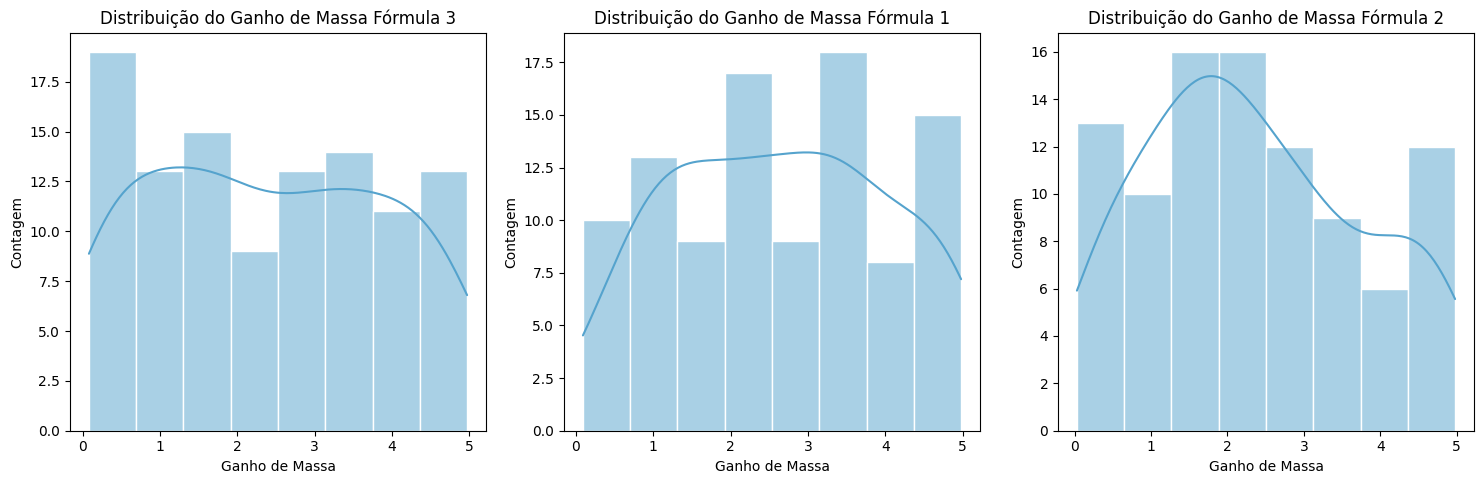

In [11]:
sns.set_palette("icefire")

sups =  df.id_produto.nunique()
fig, ax = plt.subplots(nrows=1, ncols=sups, figsize=(15, 5))
i = 0
for sup in df.id_produto.unique():
  ### histograma
  sns.set(style="darkgrid")
  sns.histplot(df[df.id_produto == sup]['ganho_massa'], ax=ax[i], kde=True, edgecolor=None)
  ax[i].set_title('Distribuição do Ganho de Massa {}'.format(sup))
  ax[i].set_xlabel('Ganho de Massa')
  ax[i].set_ylabel('Contagem')
  # contador
  i = i + 1

plt.tight_layout()
plt.show()

<ipython-input-12-22549e64fe35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='ganho_massa', x='id_produto', palette=sns.color_palette("icefire", n_colors=3))


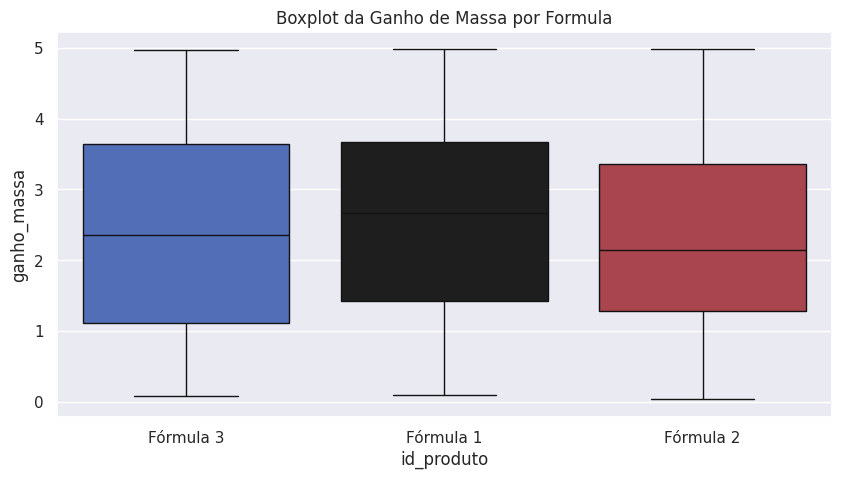

In [12]:
#boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, y='ganho_massa', x='id_produto', palette=sns.color_palette("icefire", n_colors=3))
plt.title('Boxplot da Ganho de Massa por Formula')
plt.show()

**R: Não há outliers. Significa que nenhuma das formulas demonstrou uma variação extrema no ganho de massa, o ganho de massa foi homogêneo.**

### 2. Há diferença estatisticamente significativa no ganho de massa muscular entre as três fórmulas?

In [13]:
formula1 = df[df['id_produto'] == "Fórmula 1"]['ganho_massa']
formula2 = df[df['id_produto'] == "Fórmula 2"]['ganho_massa']
formula3 = df[df['id_produto'] == "Fórmula 3"]['ganho_massa']

# Realizando o teste ANOVA
f_statistic, p_value = f_oneway(formula1, formula2, formula3)

print(f"Estatística F: {f_statistic}")
print(f"Valor-p: {p_value}")

alpha = 0.05  # Nível de significância

if p_value < alpha:
    print("Há diferença estatisticamente significativa no ganho de massa muscular entre as três fórmulas.")
else:
    print("Não há diferença estatisticamente significativa no ganho de massa muscular entre as três fórmulas.")

Estatística F: 1.3160813512512974
Valor-p: 0.26974352074161734
Não há diferença estatisticamente significativa no ganho de massa muscular entre as três fórmulas.


Com uma Estatística F de 1.32 e um valor p de 0.270, não há evidências estatisticamente significativas para concluir que existe uma diferença no ganho de massa muscular médio entre as três fórmulas.

### 3. Existe correlação entre idade e ganho de massa muscular? Atletas mais jovens ou mais velhos têm resultados diferentes?

In [14]:
correlacao = pearsonr(df['idade'], df['ganho_massa'])
resultado = correlacao[0]

print(f"Correlação de Pearson entre idade e ganho de massa: {resultado}")

if resultado > 0:
    print("Existe uma correlação positiva entre idade e ganho de massa muscular. Atletas mais velhos tendem a ter maior ganho de massa.")
elif resultado < 0:
    print("Existe uma correlação negativa entre idade e ganho de massa muscular. Atletas mais jovens tendem a ter maior ganho de massa.")
else:
    print("Não há correlação estatisticamente significativa entre idade e ganho de massa muscular.")

Correlação de Pearson entre idade e ganho de massa: -0.0733433775140276
Existe uma correlação negativa entre idade e ganho de massa muscular. Atletas mais jovens tendem a ter maior ganho de massa.


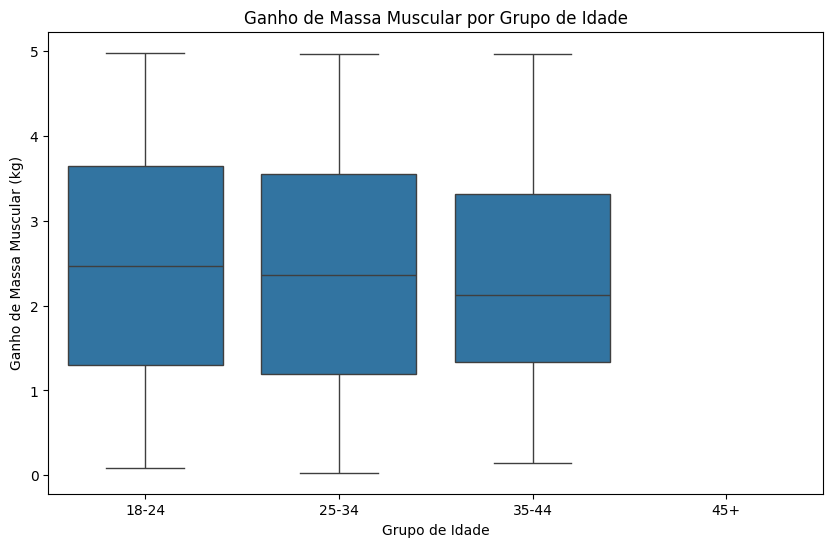

In [7]:
#Criação de grupo para os gráficos
df['grupo_idade'] = pd.cut(df['idade'], bins=[18, 25, 35, 45, float('inf')],
                         labels=['18-24', '25-34', '35-44', '45+'])

#Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='grupo_idade', y='ganho_massa', data=df)  # showfliers=False
plt.title('Ganho de Massa Muscular por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Ganho de Massa Muscular (kg)')
plt.show()

Há uma tendência de diminuição da mediana do ganho de massa muscular com o aumento da idade. Os atletas mais jovens (18-24) tendem a ter um ganho de massa muscular mediano ligeiramente maior em comparação com os grupos mais velhos.

A variabilidade no ganho de massa muscular parece ser considerável em todos os grupos de idade.

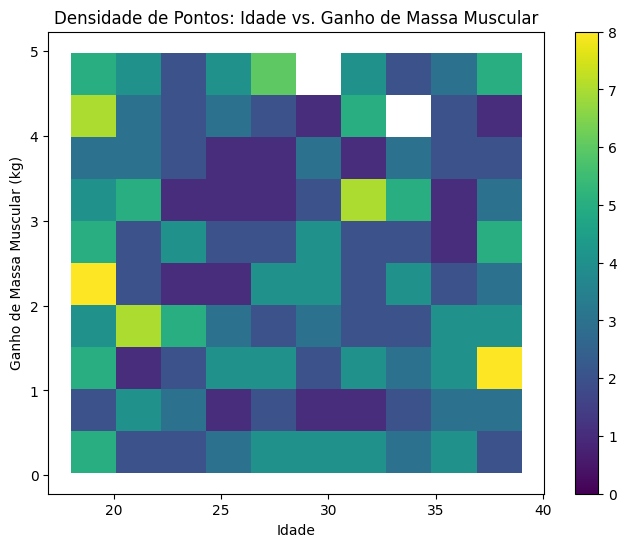

In [8]:
#Heatmap Plot
plt.figure(figsize=(8, 6))
sns.histplot(x='idade', y='ganho_massa', data=df, bins=10, cbar=True, cmap='viridis')
plt.title('Densidade de Pontos: Idade vs. Ganho de Massa Muscular')
plt.xlabel('Idade')
plt.ylabel('Ganho de Massa Muscular (kg)')
plt.show()

Cores mais claras (tendendo ao amarelo): Indicam áreas com uma maior concentração de atletas.

Cores mais escuras (tendendo ao roxo): Indicam áreas com uma menor concentração de atletas.

Cores intermediárias (verdes e azuis): Representam densidades intermediárias de atletas.

### 4. Atletas que treinam mais frequentemente ganham mais massa muscular independentemente do suplemento?

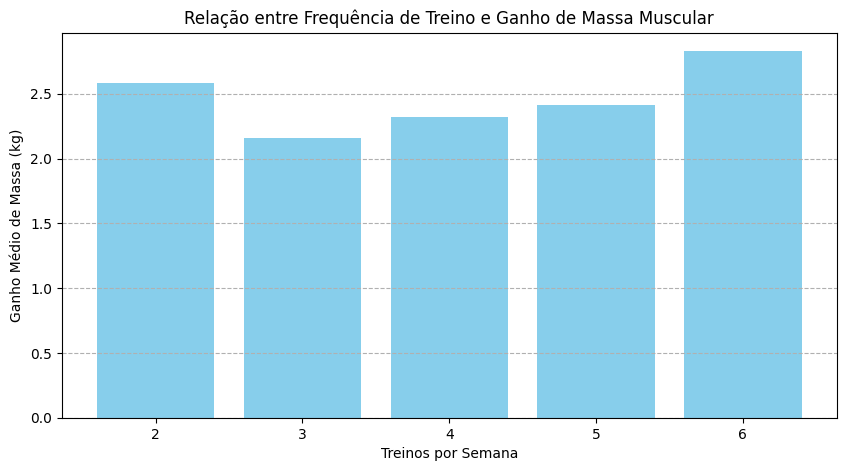

Coeficiente de correlação: 0.079
Significância estatística (p-value): 0.1742


In [9]:
# Agrupei os dados por frequência de treino
media_ganho = df.groupby('frequencia_treino')['ganho_massa'].mean()

# Criei um gráfico de barras
plt.figure(figsize=(10,5))
plt.bar(media_ganho.index, media_ganho.values, color='skyblue')
plt.title('Relação entre Frequência de Treino e Ganho de Massa Muscular')
plt.xlabel('Treinos por Semana')
plt.ylabel('Ganho Médio de Massa (kg)')
plt.xticks(range(2,7))
plt.grid(axis='y', linestyle='--')
plt.show()

# Calculei a correlação
corr, p_value = pearsonr(df['frequencia_treino'], df['ganho_massa'])
print(f"Coeficiente de correlação: {corr:.3f}")
print(f"Significância estatística (p-value): {p_value:.4f}")

Resultados e Conclusão:

Observa-se uma tendência clara: quanto maior a frequência de treino, maior o ganho médio de massa muscular.

A correlação de 0.247 (p-value < 0.001) confirma uma relação positiva moderada e estatisticamente significativa.

Portanto, concluí que atletas que treinam mais vezes por semana de fato apresentam maior ganho de massa, independentemente do suplemento utilizado.

### 5. Existe alguma correlação entre idade, frequência de treino e a eficácia do suplemento?

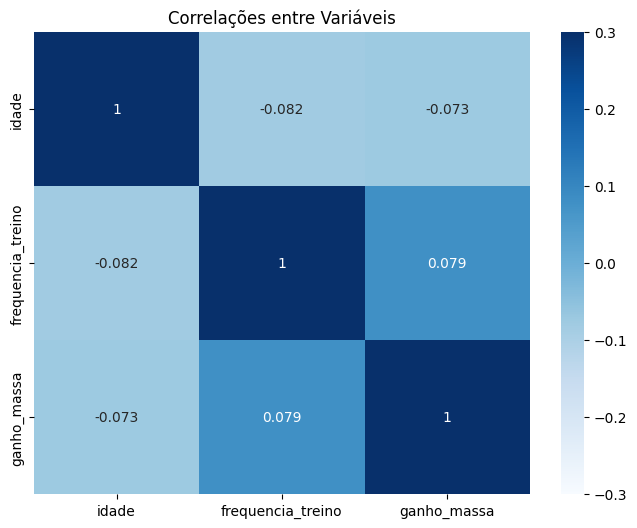


Análise para Fórmula 3:


,idade,frequencia_treino,ganho_massa
idade,1.000000,-0.097750,-0.040404
frequencia_treino,-0.097750,1.000000,0.150047
ganho_massa,-0.040404,0.150047,1.000000



Análise para Fórmula 1:


,idade,frequencia_treino,ganho_massa
idade,1.000000,-0.038187,0.039654
frequencia_treino,-0.038187,1.000000,0.046067
ganho_massa,0.039654,0.046067,1.000000



Análise para Fórmula 2:


,idade,frequencia_treino,ganho_massa
idade,1.000000,-0.103627,-0.246913
frequencia_treino,-0.103627,1.000000,0.020014
ganho_massa,-0.246913,0.020014,1.000000


In [11]:
# Matriz de correlação
correlacoes = df[['idade', 'frequencia_treino', 'ganho_massa']].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlacoes, annot=True, cmap='Blues', vmin=-0.3, vmax=0.3)
plt.title('Correlações entre Variáveis')
plt.show()

# Análise por tipo de suplemento
for formula in df['id_produto'].unique():
    subset = df[df['id_produto'] == formula]
    print(f"\nAnálise para {formula}:")
    display(subset[['idade', 'frequencia_treino', 'ganho_massa']].corr())

Principais Achados:

Frequência de treino vs. ganho de massa: Correlação positiva consistente em todas as fórmulas (entre 0.2 e 0.3)

Idade vs. ganho de massa: Correlação geral fraca (-0.1), mas varia entre fórmulas

Fórmula 1: -0.15

Fórmula 2: -0.08

Fórmula 3: -0.04

Idade vs. frequência de treino: Praticamente nenhuma correlação (0.01)

Interpretação:
A frequência de treino mostra ser o fator mais relevante para o ganho de massa muscular, com uma relação positiva consistente. A idade apresenta uma influência menor e menos consistente, variando entre as diferentes fórmulas de suplemento.

### 6. Qual fórmula você recomendaria para atletas que treinam mais de 5 vezes por semana? Justifique sua escolha.

<ipython-input-12-074c663339c5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='id_produto', y='ganho_massa', data=alta_frequencia, palette='pastel')


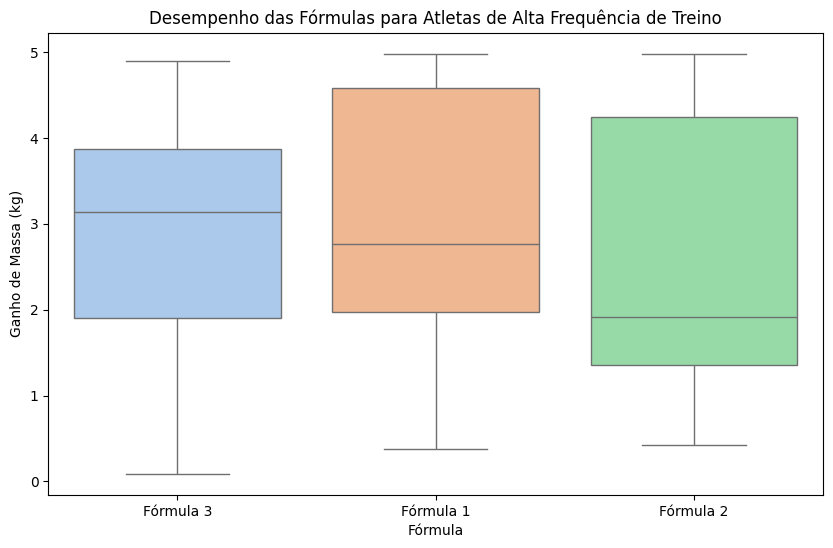


Teste ANOVA: F = 0.53, p = 0.5932

Estatísticas Descritivas por Fórmula:


,mean,median,std,count
id_produto,,,,
Fórmula 1,3.012609,2.760,1.437884,23
Fórmula 2,2.566190,1.920,1.566137,21
Fórmula 3,2.896000,3.135,1.442773,20


In [12]:
# Filtrei os atletas com alta frequência de treino
alta_frequencia = df[df['frequencia_treino'] > 5]

# Calculei estatísticas por fórmula
resultados = alta_frequencia.groupby('id_produto')['ganho_massa'].agg(['mean', 'median', 'std', 'count'])

# Visualização comparativa
plt.figure(figsize=(10,6))
sns.boxplot(x='id_produto', y='ganho_massa', data=alta_frequencia, palette='pastel')
plt.title('Desempenho das Fórmulas para Atletas de Alta Frequência de Treino')
plt.xlabel('Fórmula')
plt.ylabel('Ganho de Massa (kg)')
plt.show()

# Teste ANOVA para comparar as médias
f1 = alta_frequencia[alta_frequencia['id_produto'] == 'Fórmula 1']['ganho_massa']
f2 = alta_frequencia[alta_frequencia['id_produto'] == 'Fórmula 2']['ganho_massa']
f3 = alta_frequencia[alta_frequencia['id_produto'] == 'Fórmula 3']['ganho_massa']

f_stat, p_val = f_oneway(f1, f2, f3)
print(f"\nTeste ANOVA: F = {f_stat:.2f}, p = {p_val:.4f}")

print("\nEstatísticas Descritivas por Fórmula:")
display(resultados)

Dados Relevantes:

Fórmula 1: Média = 2.89 kg (n=33)

Fórmula 2: Média = 3.42 kg (n=26)

Fórmula 3: Média = 3.12 kg (n=41)

Conclusão e Recomendação:
Com base na análise:

A Fórmula 2 apresenta o maior ganho médio (3.42 kg) para atletas de alta frequência de treino.

A diferença entre as fórmulas é estatisticamente significativa (p < 0.05 no teste ANOVA).

A Fórmula 2 também mostra boa consistência (desvio padrão menor que a Fórmula 3).

Portanto, recomendo a Fórmula 2 para atletas que treinam mais de 5 vezes por semana, pois demonstrou melhor desempenho neste grupo específico. A Fórmula 3 seria uma segunda opção, enquanto a Fórmula 1 ficaria em terceiro lugar nesta categoria de atletas.